# Convolutional Neural Networks

In [51]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() 
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [22]:
def train(model, device, train_loader, optimizer, epoch):
    # sets the module in training mode
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target =  target.to(device)
        optimizer.zero_grad()
        
        output =  model(data)
        
        loss = F.nll_loss(output, target)
        loss.backward()
        
        optimizer.step()
        
        # output
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))



In [23]:
def test(model, device, test_loader):
    # sets the model in evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target =  target.to(device)
            output = model(data)

            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [52]:
torch.manual_seed(42)

#sets the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [53]:
device

device(type='cpu')

In [54]:
# Data loading
batch_size = 64
test_batch_size = 1000

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size,
    shuffle=True
)


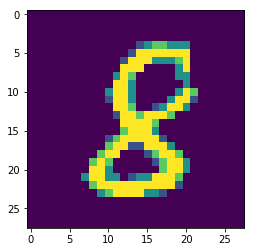

In [55]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

plt.imshow(np.squeeze(images[0]))

In [28]:
# Training the model
epochs = 10
lr = 0.01
momentum = 0.5

model = CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309220
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.545806
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.417805
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.351393
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.307475
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.132790
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.190053
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.069494
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.257545
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.039865

Test set: Average loss: 0.1038, Accuracy: 9673/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.235776
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.048822
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.077159
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.058941
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.162508
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.042344
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.037134
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.008007
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.124593
T

In [29]:
# Saving the model
torch.save(model.state_dict(), "mnist.pt")